### Installing Dependicies

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import csv
import pandas
import sklearn
import pickle
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.tree import DecisionTreeClassifier 
#from sklearn.learning_curve import learning_curve
from sklearn.model_selection import learning_curve, GridSearchCV

Importing the Dataset spam.csv

In [2]:
data = pd.read_csv('./data/spam.csv', encoding='latin-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


Removing unwanted columns

In [3]:
data = data.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
data = data.rename(columns={"v2" : "text", "v1":"label"})

In [4]:
data[1990:2000]

,label,text
1990,ham,HI DARLIN IVE JUST GOT BACK AND I HAD A REALLY...
1991,ham,No other Valentines huh? The proof is on your ...
1992,spam,Free tones Hope you enjoyed your new content. ...
1993,ham,Eh den sat u book e kb liao huh...
1994,ham,Have you been practising your curtsey?
1995,ham,Shall i come to get pickle
1996,ham,Lol boo I was hoping for a laugh
1997,ham,\YEH I AM DEF UP4 SOMETHING SAT
1998,ham,"Well, I have to leave for my class babe ... Yo..."
1999,ham,LMAO where's your fish memory when I need it?


In [5]:
data['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

<AxesSubplot:xlabel='label', ylabel='Count'>

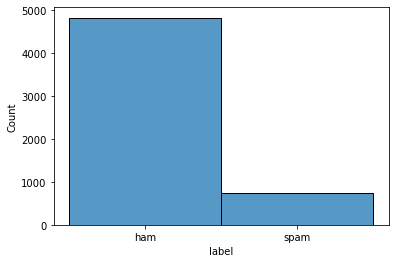

In [6]:
import seaborn as sns
sns.histplot(data=data["label"])

### Some Visualisations

In [7]:
import nltk
nltk.download("punkt")
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Error loading punkt: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


### WordClouds- to see which words are common in SPAM and NOT SPAM mesaages

In [8]:
ham_words = ''
spam_words = ''

In [9]:
ham_words

''

In [10]:
for val in data[data['label'] == 'spam'].text:
    text = val.lower()
    tokens = nltk.word_tokenize(text)
    for words in tokens:
        spam_words = spam_words + words + ' '
        
for val in data[data['label'] == 'ham'].text:
    text = val.lower()
    tokens = nltk.word_tokenize(text)
    for words in tokens:
        ham_words = ham_words + words + ' '

In [11]:
ham_words

"go until jurong point , crazy .. available only in bugis n great world la e buffet ... cine there got amore wat ... ok lar ... joking wif u oni ... u dun say so early hor ... u c already then say ... nah i do n't think he goes to usf , he lives around here though even my brother is not like to speak with me . they treat me like aids patent . as per your request 'melle melle ( oru minnaminunginte nurungu vettam ) ' has been set as your callertune for all callers . press * 9 to copy your friends callertune i 'm gon na be home soon and i do n't want to talk about this stuff anymore tonight , k ? i 've cried enough today . i 've been searching for the right words to thank you for this breather . i promise i wont take your help for granted and will fulfil my promise . you have been wonderful and a blessing at all times . i have a date on sunday with will ! ! oh k ... i 'm watching here : ) eh u remember how 2 spell his name ... yes i did . he v naughty make until i v wet . fine if thatåõs 

In [12]:
spam_wordcloud = WordCloud(width=500, height=300).generate(spam_words)
ham_wordcloud = WordCloud(width=500, height=300).generate(ham_words)

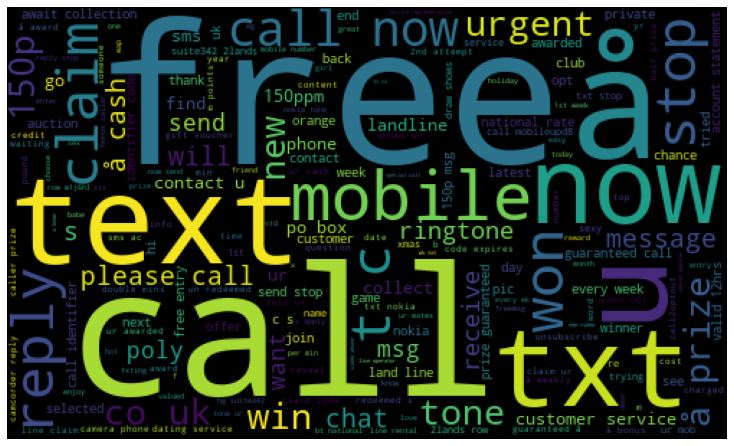

In [13]:
#Spam Word cloud
plt.figure( figsize=(10,8), facecolor='w')
plt.imshow(spam_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

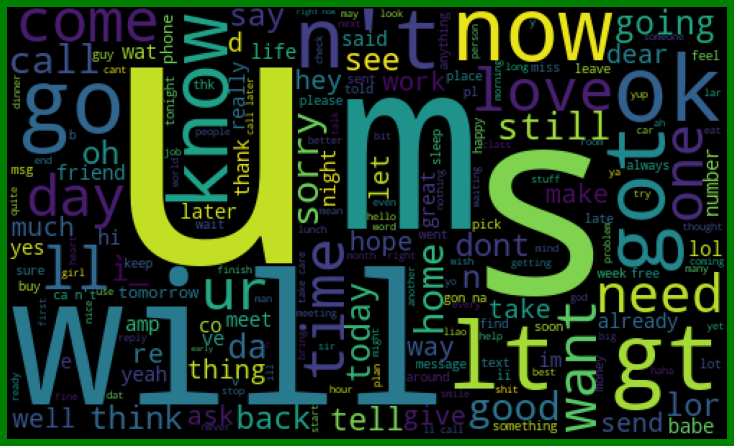

In [14]:
plt.figure( figsize=(10,8), facecolor='g')
plt.imshow(ham_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [15]:
data = data.replace(['ham','spam'],[0, 1]) 

In [16]:
data['label'].value_counts()

0    4825
1     747
Name: label, dtype: int64

In [17]:
data.head(10)

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
5,1,FreeMsg Hey there darling it's been 3 week's n...
6,0,Even my brother is not like to speak with me. ...
7,0,As per your request 'Melle Melle (Oru Minnamin...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...


### Removing Stopwords from the messages

In [18]:
import string
def text_process(text):
    
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = [word for word in text.split() if word.lower() not in stopwords.words('english')]
    
    return " ".join(text)

In [19]:
data['text'] = data['text'].str.lower()

In [20]:
data['text'] = data['text'].apply(text_process)

In [21]:
data.head()

,label,text
0,0,go jurong point crazy available bugis n great ...
1,0,ok lar joking wif u oni
2,1,free entry 2 wkly comp win fa cup final tkts 2...
3,0,u dun say early hor u c already say
4,0,nah dont think goes usf lives around though


In [22]:
text = pd.DataFrame(data['text'])
label = pd.DataFrame(data['label'])

In [23]:
## Counting how many times a word appears in the dataset

from collections import Counter

total_counts = Counter()
for i in range(len(text)):
    for word in text.values[i][0].split(" "):
        total_counts[word] += 1

print("Total words in data set: ", len(total_counts))

Total words in data set:  9432


In [24]:
## Sorting in decreasing order (Word with highest frequency appears first)
vocab = sorted(total_counts, key=total_counts.get, reverse=True)
print(vocab[:60])

['u', 'call', '2', 'im', 'get', 'ur', '4', 'dont', 'go', 'ok', 'ltgt', 'free', 'know', 'like', 'got', 'ill', 'good', 'come', 'time', 'day', 'love', 'want', 'send', 'text', 'going', 'one', 'need', 'txt', 'home', 'lor', 'see', 'sorry', 'still', 'r', 'back', 'stop', 'reply', 'n', 'today', 'mobile', 'tell', 'new', 'later', 'well', 'think', 'da', 'hi', 'please', 'take', 'phone', 'cant', 'ì', 'week', 'claim', 'much', 'night', 'oh', 'great', 'hey', 'dear']


In [25]:
# Mapping from words to index

vocab_size = len(vocab)
word2idx = {}
#print vocab_size
for i, word in enumerate(vocab):
    word2idx[word] = i

In [26]:
### Text to Vector
def text_to_vector(text):
    word_vector = np.zeros(vocab_size)
    for word in text.split(" "):
        if word2idx.get(word) is None:
            continue
        else:
            word_vector[word2idx.get(word)] += 1
    return np.array(word_vector)

In [27]:
## Convert all titles to vectors
word_vectors = np.zeros((len(text), len(vocab)), dtype=np.int_)
for ii, (_, text_) in enumerate(text.iterrows()):
    word_vectors[ii] = text_to_vector(text_[0])

In [28]:
word_vectors.shape

(5572, 9432)

## Converting words to vectors using TFIDF Vectorizer

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(data['text'])
vectors.shape

(5572, 9376)

In [30]:
#features = word_vectors
features = vectors

X, Y =features, data['label']

In [31]:
!pip install imbalanced-learn==0.9.0

In [33]:
from imblearn.combine import SMOTETomek
sm = SMOTETomek()
X_bal, Y_bal = sm.fit_resample(X, Y)

<AxesSubplot:xlabel='label', ylabel='Count'>

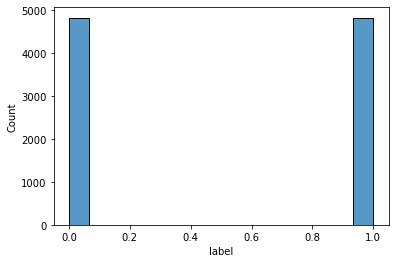

In [61]:
import seaborn as sns
sns.histplot(data=Y_bal)

In [ ]:
X_bal

### Splitting into training and test set

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_bal, Y_bal, test_size=0.15, random_state=111)

In [35]:
print (X_train.shape)
print (X_test.shape)
print (Y_train.shape)
print (Y_test.shape)

(8202, 9376)
(1448, 9376)
(8202,)
(1448,)


In [36]:
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

In [37]:
from sklearn.linear_model import LogisticRegression
lrc = LogisticRegression(solver='liblinear', penalty='l1')
lrc.fit(X_train,Y_train)
LR=lrc.score(X_train,Y_train)
test_accuracy = lrc.score(X_test, Y_test)
print('Score:{}'.format(test_accuracy))



Score:0.9785911602209945


Confusion Matrix
[[729   9]
 [ 22 688]]


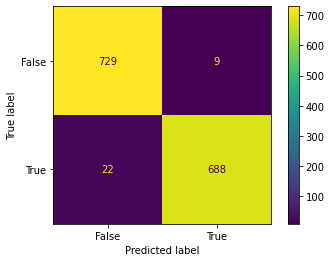

In [38]:
Y_pred = lrc.predict(X_test)
confusion_mat = confusion_matrix(Y_test,Y_pred)
print("Confusion Matrix")
print(confusion_mat)
trsc = accuracy_score(Y_test,Y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_mat, display_labels = [False, True])
cm_display.plot()
plt.show()

In [39]:
from sklearn.svm import SVC
svc = SVC(kernel='sigmoid', gamma=1.0)
svc.fit(X_train,Y_train)
SVC=svc.score(X_train,Y_train)
test_accuracy = svc.score(X_test, Y_test)
print('Score:{}'.format(test_accuracy))


Score:0.9965469613259669


Confusion Matrix
[[737   1]
 [  4 706]]


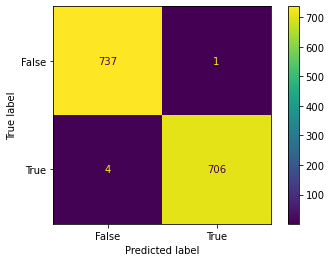

In [40]:
Y_pred = svc.predict(X_test)
confusion_mat = confusion_matrix(Y_test,Y_pred)
print("Confusion Matrix")
print(confusion_mat)
trsc = accuracy_score(Y_test,Y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_mat, display_labels = [False, True])
cm_display.plot()
plt.show()

In [41]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB(alpha=0.2)
mnb.fit(X_train,Y_train)
MNB=mnb.score(X_train,Y_train)
test_accuracy = mnb.score(X_test, Y_test)
print('Score:{}'.format(test_accuracy))



Score:0.9924033149171271


Confusion Matrix
[[731   7]
 [  4 706]]


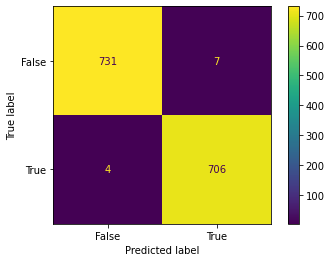

In [42]:
Y_pred = mnb.predict(X_test)
confusion_mat = confusion_matrix(Y_test,Y_pred)
print("Confusion Matrix")
print(confusion_mat)
trsc = accuracy_score(Y_test,Y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_mat, display_labels = [False, True])
cm_display.plot()
plt.show()

In [43]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors=49)
knc.fit(X_train,Y_train)
KNN=knc.score(X_train,Y_train)
test_accuracy = knc.score(X_test, Y_test)
print('Score:{}'.format(test_accuracy))


Score:0.5794198895027625


Confusion Matrix
[[129 609]
 [  0 710]]


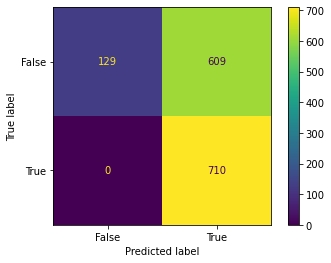

In [44]:
Y_pred = knc.predict(X_test)
confusion_mat = confusion_matrix(Y_test,Y_pred)
print("Confusion Matrix")
print(confusion_mat)
trsc = accuracy_score(Y_test,Y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_mat, display_labels = [False, True])
cm_display.plot()
plt.show()

In [45]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier(min_samples_split=7, random_state=111)
etc.fit(X_train,Y_train)
ET=etc.score(X_train,Y_train)
test_accuracy = etc.score(X_test, Y_test)
print('Score:{}'.format(test_accuracy))

Score:0.9972375690607734


Confusion Matrix
[[737   1]
 [  3 707]]


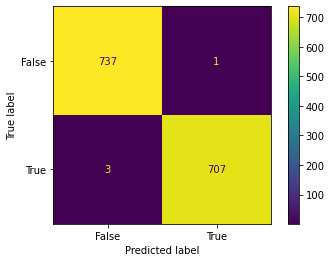

In [46]:
Y_pred = etc.predict(X_test)
confusion_mat = confusion_matrix(Y_test,Y_pred)
print("Confusion Matrix")
print(confusion_mat)
trsc = accuracy_score(Y_test,Y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_mat, display_labels = [False, True])
cm_display.plot()
plt.show()

In [47]:
from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier()
adb.fit(X_train,Y_train)
AB=adb.score(X_train,Y_train)
test_accuracy = adb.score(X_test, Y_test)
print('Score:{}'.format(test_accuracy))
AB

Score:0.9792817679558011


0.977566447207998

Confusion Matrix
[[724  14]
 [ 16 694]]


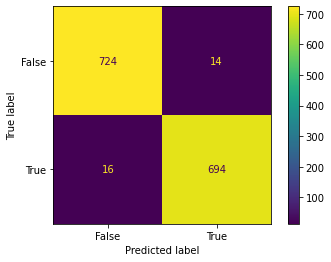

In [48]:
Y_pred = adb.predict(X_test)
confusion_mat = confusion_matrix(Y_test,Y_pred)
print("Confusion Matrix")
print(confusion_mat)
trsc = accuracy_score(Y_test,Y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_mat, display_labels = [False, True])
cm_display.plot()
plt.show()

In [49]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=31, random_state=111)
rfc.fit(X_train,Y_train)
RF=rfc.score(X_train,Y_train)
test_accuracy = rfc.score(X_test, Y_test)
print('Score:{}'.format(test_accuracy))
RF

Score:0.9930939226519337


1.0

Confusion Matrix
[[738   0]
 [ 10 700]]


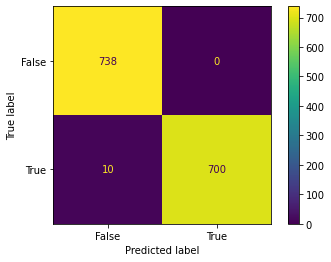

In [50]:
Y_pred = rfc.predict(X_test)
confusion_mat = confusion_matrix(Y_test,Y_pred)
print("Confusion Matrix")
print(confusion_mat)
trsc = accuracy_score(Y_test,Y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_mat, display_labels = [False, True])
cm_display.plot()
plt.show()

In [51]:
import matplotlib.pyplot as plt
from matplotlib.cm import rainbow
%matplotlib inline
import numpy as np

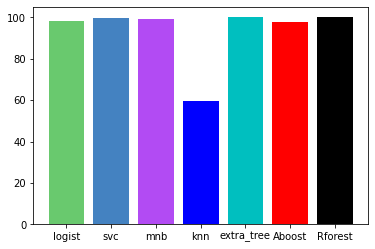

In [52]:
LR  = LR* 100
SVC = SVC* 100
MNB = MNB* 100
KNN = KNN* 100
ET  = ET* 100
AB  = AB* 100
RF  = RF* 100

height = [LR,SVC,MNB,KNN,ET,AB,RF]
bars = ('logist', 'svc','mnb','knn','extra_tree','Aboost','Rforest')
x_pos = np.arange(len(bars))
plt.bar(x_pos, height, color=['#69C96E', '#4482C1', '#B24BF3','b','c','r','k'])
plt.xticks(x_pos, bars)
plt.show()

In [53]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'[A-Za-z]+')

In [54]:
from sklearn.pipeline import make_pipeline

In [55]:
pipeline= make_pipeline(CountVectorizer(tokenizer = RegexpTokenizer(r'[A-Za-z]+').tokenize,stop_words='english'),etc)

In [56]:
trainX, testX, trainY, testY = train_test_split(data.text, data.label)

In [57]:
pipeline.fit(trainX,trainY)

Pipeline(steps=[('countvectorizer',
                 CountVectorizer(stop_words='english',
                                 tokenizer=<bound method RegexpTokenizer.tokenize of RegexpTokenizer(pattern='[A-Za-z]+', gaps=False, discard_empty=True, flags=re.UNICODE|re.MULTILINE|re.DOTALL)>)),
                ('extratreesclassifier',
                 ExtraTreesClassifier(min_samples_split=7, random_state=111))])

In [58]:
test=['Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&Cs apply 08452810075over18s			']


test

['Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&Cs apply 08452810075over18s\t\t\t']

In [59]:
result3 = pipeline.predict(test)
result3

array([1], dtype=int64)

## Classifying using sklearn pre built classifiers

In [60]:
import joblib
joblib.dump(pipeline, r'./pipeline.pkl')

['./pipeline.pkl']